# Restaurant food inspection

This project looks into the food inspections dataset for the various food facilities in Chicago, and would predict whether the food facility passed or failed the inspection taking into account the remarks from the violations column. This project will extensively use Natural Language Processing to achieve the said result.

## Google’s self-driving cars and robots get a lot of press, but the company’s real future is in machine learning, the technology that enables computers to get smarter and more personal.

 – Eric Schmidt (Google Chairman)

## Imports

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, \
HashingVectorizer, TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

The first thing to do is to read in the dataset using the Pandas' read_csv() function and naming the dataframe as 'df'.

In [416]:
#Loading the file
df = pd.read_csv('FoodInspections.csv')


In [417]:
#Displaying the first 5 rows of the dataset
df.head()

Inspection ID                           DBA Name  \
0        1970725                  ELYSIA ROOT CAKES   
1        1970723          TODDLER TOWN DAY CARE TOO   
2        1970704  CHICAGO CREAMPUFFS AND CAKES LLC.   
3        1955335        CHIPOTLE MEXICAN GRILL#2768   
4        1970749           79TH KINGSTONE FOOD MART   

                            AKA Name  License #                 Facility Type  \
0                  ELYSIA ROOT CAKES  2299030.0                        Bakery   
1          TODDLER TOWN DAY CARE TOO  2215881.0  Children's Services Facility   
2  CHICAGO CREAMPUFFS AND CAKES LLC.  2293718.0                        Bakery   
3                           CHIPOTLE  2476569.0                    Restaurant   
4           79TH KINGSTONE FOOD MART  1245200.0                 Grocery Store   

              Risk                    Address     City State      Zip  \
0  Risk 2 (Medium)          1939 W FULTON ST   CHICAGO    IL  60612.0   
1    Risk 1 (High)  5934-5936 W DIVERSEY AVE   CHICAGO    IL  60639.0   
2  Risk 2 (Medium)           2734 W 111TH ST   CHICAGO    IL  60655.0   
3    Risk 1 (High)             806 W 63RD ST   CHICAGO    IL  60621.0   
4  Risk 2 (Medium)            2523 E 79TH ST   CHICAGO    IL  60649.0   

  Inspection Date        Inspection Type          Results  \
0      11/02/2016                Canvass             Pass   
1      11/02/2016                Canvass             Pass   
2      11/02/2016                Canvass  Out of Business   
3      11/02/2016  License Re-Inspection             Pass   
4      11/02/2016   Short Form Complaint             Pass   

                                          Violations   Latitude  Longitude  \
0  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...  41.886675 -87.675908   
1  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...  41.931263 -87.774969   
2                                                NaN  41.691808 -87.689885   
3                                                NaN  41.779856 -87.645142   
4  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...  41.751666 -87.562823   

                                   Location  
0  (41.886674822367304, -87.67590783571049)  
1    (41.9312625519017, -87.77496927376998)  
2     (41.6918083543123, -87.6898852579178)  
3   (41.77985559084816, -87.64514243359771)  
4   (41.75166609505252, -87.56282258645444)

### Features Description

Variables Description:

Inspection Id: Inspection Id

DBA Name: Name of the facility

AKA Name: Alias name

License#: License number of the facility

Facility Type: Type of the facility

Risk: Risk 1,2 or 3

Address: Address of the facility

City: City

State: State

Zip: Zip code

Inspection Date: Date of inspection

Inspection Type: Type of inspection 

Results: Result of the inspection , Pass,Fail,Pass with conditions etc

Violations: Violations remarks

Latitude: Latitude

Longitude: Longitude

Location: Location

In [428]:
# Displays the columns and the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20230 entries, 0 to 20633
Data columns (total 17 columns):
inspection_id      20230 non-null int64
dba_name           20230 non-null object
aka_name           20230 non-null object
license_#          20230 non-null float64
facility_type      20230 non-null object
risk               20230 non-null object
address            20230 non-null object
city               20230 non-null object
state              20230 non-null object
zip                20230 non-null float64
inspection_date    20230 non-null object
inspection_type    20230 non-null object
results            20230 non-null object
violations         20230 non-null object
latitude           20230 non-null float64
longitude          20230 non-null float64
location           20230 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 2.8+ MB


In [429]:
# Replacing the spaces of columns names with an underscore and
df.columns =[x.lower().replace(' ','_') for x in df.columns]

In [430]:
df.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [431]:
#Checking for the number of rows and columns in the dataset
df.shape

(20230, 17)

Check for the null values

In [432]:
df.isnull().sum()

inspection_id      0
dba_name           0
aka_name           0
license_#          0
facility_type      0
risk               0
address            0
city               0
state              0
zip                0
inspection_date    0
inspection_type    0
results            0
violations         0
latitude           0
longitude          0
location           0
dtype: int64

In [433]:
df['violations'].fillna('None',inplace = True)

In [434]:
df.shape

(20230, 17)

In [435]:
df.dropna(axis=0,inplace=True)

In [436]:
df.shape

(20230, 17)

In [437]:
df.isnull().sum()

inspection_id      0
dba_name           0
aka_name           0
license_#          0
facility_type      0
risk               0
address            0
city               0
state              0
zip                0
inspection_date    0
inspection_type    0
results            0
violations         0
latitude           0
longitude          0
location           0
dtype: int64

Converting the Results column to binary values: pass and fail

In [438]:
df['results'].value_counts()

Pass                    11739
Fail                     3916
Pass w/ Conditions       1997
Out of Business          1163
No Entry                 1042
Not Ready                 371
Business Not Located        2
Name: results, dtype: int64

In [439]:
df['results'] = df['results'].map(lambda x: 1 if x == 'Pass' or x == 'Pass w/ Conditions' else 0)

In [440]:
df['results'].value_counts()

1    13736
0     6494
Name: results, dtype: int64

In [441]:
sns.countplot(x='results',data=df, palette='hls')

In [442]:
# Checking the values for different facilities
df['facility_type'].value_counts()

Restaurant                                14578
Grocery Store                              2138
School                                     1068
Children's Services Facility                400
Bakery                                      307
Daycare (2 - 6 Years)                       247
Daycare Above and Under 2 Years             236
Long Term Care                              165
Mobile Food Preparer                        145
Liquor                                      102
Catering                                    102
Mobile Food Dispenser                        70
Hospital                                     62
Daycare Combo 1586                           60
Golden Diner                                 58
Mobile Prepared Food Vendor                  26
CHARTER SCHOOL                               24
Special Event                                23
BANQUET HALL                                 21
Shared Kitchen                               18
TAVERN                                  

Mapping the restaurant feature so that 1 denotes Restaurant and 0 represents any other facility

In [443]:
df['facility_type'] = df['facility_type'].map(lambda x: 1 if x == 'Restaurant' else 0)

In [444]:
df['facility_type'].value_counts()

1    14578
0     5652
Name: facility_type, dtype: int64

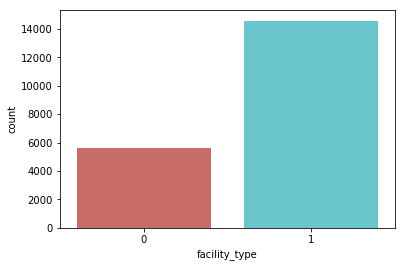

In [445]:
# Number of food inspections by facility type
sns.countplot(x='facility_type',data=df, palette='hls')

In [446]:
#Inspection types
df['inspection_type'].value_counts()

Canvass                                   10634
License                                    2724
Canvass Re-Inspection                      2614
Complaint                                  2021
License Re-Inspection                       778
Complaint Re-Inspection                     773
Short Form Complaint                        545
Suspected Food Poisoning                     77
Recent Inspection                            35
Suspected Food Poisoning Re-inspection       14
Consultation                                 11
Non-Inspection                                2
fire complaint                                1
FIRE                                          1
Name: inspection_type, dtype: int64

In [447]:
# Number of food inspection by inspection date
df['inspection_date'].value_counts()

11/29/2016    143
03/21/2017    130
05/03/2017    126
11/03/2016    123
05/04/2017    122
11/10/2016    122
01/19/2017    121
05/11/2017    120
06/06/2017    119
03/23/2017    119
11/14/2016    118
02/07/2017    118
06/08/2017    118
05/02/2017    117
11/04/2016    117
06/15/2017    117
01/11/2017    116
04/04/2017    115
03/15/2017    115
03/16/2017    115
06/02/2017    113
03/10/2017    112
03/02/2017    112
05/26/2017    112
03/09/2017    112
06/22/2017    111
06/09/2017    110
05/15/2017    110
02/08/2017    110
03/17/2017    109
             ... 
04/07/2017     35
10/25/2017     34
10/18/2017     33
07/03/2017     30
11/01/2017     29
07/26/2017     28
07/05/2017     27
11/17/2017     25
11/15/2017     25
11/28/2016     24
01/03/2017     24
11/20/2017     21
06/10/2017     12
11/07/2016     12
06/05/2017     10
08/07/2017      9
12/30/2016      8
09/11/2017      6
06/24/2017      6
08/26/2017      6
11/21/2017      4
03/13/2017      4
05/01/2017      3
11/06/2017      3
04/03/2017

In [448]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

In [449]:
# Number of food inspections by zip
sns.countplot(x='zip',data = df, palette = 'hls')

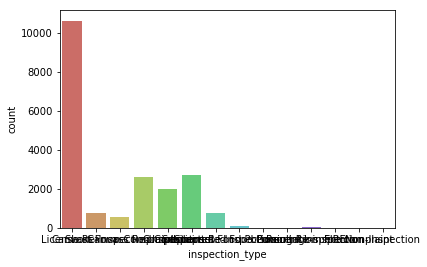

In [450]:
# Number of food inspections by inspection type
sns.countplot(x='inspection_type',data = df,palette = 'hls')

In [451]:
df['risk'].value_counts()

Risk 1 (High)      15414
Risk 2 (Medium)     3618
Risk 3 (Low)        1197
All                    1
Name: risk, dtype: int64

Transforming risk into a categorical feature having values 1,2,3

In [452]:
df["risk"] = df["risk"].astype('category')
df.dtypes

inspection_id         int64
dba_name             object
aka_name             object
license_#           float64
facility_type         int64
risk               category
address              object
city                 object
state                object
zip                 float64
inspection_date      object
inspection_type      object
results               int64
violations           object
latitude            float64
longitude           float64
location             object
dtype: object

In [453]:
df["risk_cat"] = df["risk"].cat.codes
df.head()

inspection_id                           dba_name  \
0        1970725                  ELYSIA ROOT CAKES   
1        1970723          TODDLER TOWN DAY CARE TOO   
2        1970704  CHICAGO CREAMPUFFS AND CAKES LLC.   
3        1955335        CHIPOTLE MEXICAN GRILL#2768   
4        1970749           79TH KINGSTONE FOOD MART   

                            aka_name  license_#  facility_type  \
0                  ELYSIA ROOT CAKES  2299030.0              0   
1          TODDLER TOWN DAY CARE TOO  2215881.0              0   
2  CHICAGO CREAMPUFFS AND CAKES LLC.  2293718.0              0   
3                           CHIPOTLE  2476569.0              1   
4           79TH KINGSTONE FOOD MART  1245200.0              0   

              risk                    address     city state      zip  \
0  Risk 2 (Medium)          1939 W FULTON ST   CHICAGO    IL  60612.0   
1    Risk 1 (High)  5934-5936 W DIVERSEY AVE   CHICAGO    IL  60639.0   
2  Risk 2 (Medium)           2734 W 111TH ST   CHICAGO    IL  60655.0   
3    Risk 1 (High)             806 W 63RD ST   CHICAGO    IL  60621.0   
4  Risk 2 (Medium)            2523 E 79TH ST   CHICAGO    IL  60649.0   

  inspection_date        inspection_type  results  \
0      11/02/2016                Canvass        1   
1      11/02/2016                Canvass        1   
2      11/02/2016                Canvass        0   
3      11/02/2016  License Re-Inspection        1   
4      11/02/2016   Short Form Complaint        1   

                                          violations   latitude  longitude  \
0  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...  41.886675 -87.675908   
1  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...  41.931263 -87.774969   
2                                               None  41.691808 -87.689885   
3                                               None  41.779856 -87.645142   
4  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...  41.751666 -87.562823   

                                   location  risk_cat  
0  (41.886674822367304, -87.67590783571049)         2  
1    (41.9312625519017, -87.77496927376998)         1  
2     (41.6918083543123, -87.6898852579178)         2  
3   (41.77985559084816, -87.64514243359771)         1  
4   (41.75166609505252, -87.56282258645444)         2

In [454]:
df['risk']= df['risk_cat']

In [455]:
df.head()

inspection_id                           dba_name  \
0        1970725                  ELYSIA ROOT CAKES   
1        1970723          TODDLER TOWN DAY CARE TOO   
2        1970704  CHICAGO CREAMPUFFS AND CAKES LLC.   
3        1955335        CHIPOTLE MEXICAN GRILL#2768   
4        1970749           79TH KINGSTONE FOOD MART   

                            aka_name  license_#  facility_type  risk  \
0                  ELYSIA ROOT CAKES  2299030.0              0     2   
1          TODDLER TOWN DAY CARE TOO  2215881.0              0     1   
2  CHICAGO CREAMPUFFS AND CAKES LLC.  2293718.0              0     2   
3                           CHIPOTLE  2476569.0              1     1   
4           79TH KINGSTONE FOOD MART  1245200.0              0     2   

                     address     city state      zip inspection_date  \
0          1939 W FULTON ST   CHICAGO    IL  60612.0      11/02/2016   
1  5934-5936 W DIVERSEY AVE   CHICAGO    IL  60639.0      11/02/2016   
2           2734 W 111TH ST   CHICAGO    IL  60655.0      11/02/2016   
3             806 W 63RD ST   CHICAGO    IL  60621.0      11/02/2016   
4            2523 E 79TH ST   CHICAGO    IL  60649.0      11/02/2016   

         inspection_type  results  \
0                Canvass        1   
1                Canvass        1   
2                Canvass        0   
3  License Re-Inspection        1   
4   Short Form Complaint        1   

                                          violations   latitude  longitude  \
0  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...  41.886675 -87.675908   
1  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...  41.931263 -87.774969   
2                                               None  41.691808 -87.689885   
3                                               None  41.779856 -87.645142   
4  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...  41.751666 -87.562823   

                                   location  risk_cat  
0  (41.886674822367304, -87.67590783571049)         2  
1    (41.9312625519017, -87.77496927376998)         1  
2     (41.6918083543123, -87.6898852579178)         2  
3   (41.77985559084816, -87.64514243359771)         1  
4   (41.75166609505252, -87.56282258645444)         2

In [456]:
# Number of food inspections by risk
sns.countplot(x='risk',data = df, palette ='hls')

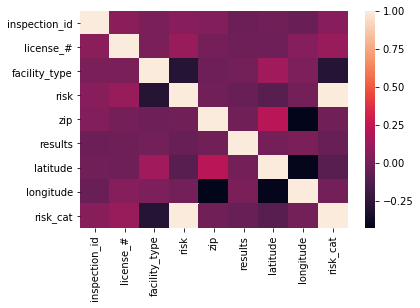

In [457]:
sns.heatmap(df.corr())

## Preprocessing

In [458]:
df.head()

inspection_id                           dba_name  \
0        1970725                  ELYSIA ROOT CAKES   
1        1970723          TODDLER TOWN DAY CARE TOO   
2        1970704  CHICAGO CREAMPUFFS AND CAKES LLC.   
3        1955335        CHIPOTLE MEXICAN GRILL#2768   
4        1970749           79TH KINGSTONE FOOD MART   

                            aka_name  license_#  facility_type  risk  \
0                  ELYSIA ROOT CAKES  2299030.0              0     2   
1          TODDLER TOWN DAY CARE TOO  2215881.0              0     1   
2  CHICAGO CREAMPUFFS AND CAKES LLC.  2293718.0              0     2   
3                           CHIPOTLE  2476569.0              1     1   
4           79TH KINGSTONE FOOD MART  1245200.0              0     2   

                     address     city state      zip inspection_date  \
0          1939 W FULTON ST   CHICAGO    IL  60612.0      11/02/2016   
1  5934-5936 W DIVERSEY AVE   CHICAGO    IL  60639.0      11/02/2016   
2           2734 W 111TH ST   CHICAGO    IL  60655.0      11/02/2016   
3             806 W 63RD ST   CHICAGO    IL  60621.0      11/02/2016   
4            2523 E 79TH ST   CHICAGO    IL  60649.0      11/02/2016   

         inspection_type  results  \
0                Canvass        1   
1                Canvass        1   
2                Canvass        0   
3  License Re-Inspection        1   
4   Short Form Complaint        1   

                                          violations   latitude  longitude  \
0  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...  41.886675 -87.675908   
1  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...  41.931263 -87.774969   
2                                               None  41.691808 -87.689885   
3                                               None  41.779856 -87.645142   
4  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...  41.751666 -87.562823   

                                   location  risk_cat  
0  (41.886674822367304, -87.67590783571049)         2  
1    (41.9312625519017, -87.77496927376998)         1  
2     (41.6918083543123, -87.6898852579178)         2  
3   (41.77985559084816, -87.64514243359771)         1  
4   (41.75166609505252, -87.56282258645444)         2

In [459]:
df1 = df[['inspection_type','violations','results']]

In [460]:
df1.head()

inspection_type                                         violations  \
0                Canvass  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...   
1                Canvass  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...   
2                Canvass                                               None   
3  License Re-Inspection                                               None   
4   Short Form Complaint  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...   

   results  
0        1  
1        1  
2        0  
3        1  
4        1

In [461]:
df1 = df1.copy().reset_index(drop=True)

In [462]:
df1.head()

inspection_type                                         violations  \
0                Canvass  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...   
1                Canvass  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...   
2                Canvass                                               None   
3  License Re-Inspection                                               None   
4   Short Form Complaint  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...   

   results  
0        1  
1        1  
2        0  
3        1  
4        1

In [463]:
def remove_punctuation(text):
    lower = text.lower()
    exclude = set(string.punctuation)
    return "".join(ch for ch in lower if ch not in exclude)

In [464]:
df1['processed_text'] = df1['violations'].apply(remove_punctuation)

In [465]:
df1.head()

inspection_type                                         violations  \
0                Canvass  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...   
1                Canvass  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...   
2                Canvass                                               None   
3  License Re-Inspection                                               None   
4   Short Form Complaint  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...   

   results                                     processed_text  
0        1  32 food and nonfood contact surfaces properly ...  
1        1  35 walls ceilings attached equipment construct...  
2        0                                               none  
3        1                                               none  
4        1  38 ventilation rooms and equipment vented as r...

In [466]:
def remove_stopwords(x):
    lower = x.lower()
    split = lower.split()
    final = ''
    for i in split:
        if i not in stopwords.words('english'):
            final += (i + " ")
    return final

In [467]:
df1['processed_text1'] = df1['processed_text'].apply(remove_stopwords)

In [468]:
df1.head()

inspection_type                                         violations  \
0                Canvass  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...   
1                Canvass  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...   
2                Canvass                                               None   
3  License Re-Inspection                                               None   
4   Short Form Complaint  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...   

   results                                     processed_text  \
0        1  32 food and nonfood contact surfaces properly ...   
1        1  35 walls ceilings attached equipment construct...   
2        0                                               none   
3        1                                               none   
4        1  38 ventilation rooms and equipment vented as r...   

                                     processed_text1  
0  32 food nonfood contact surfaces properly desi...  
1  35 walls ceilings attached equipment construct...  
2                                              none   
3                                              none   
4  38 ventilation rooms equipment vented required...

In [469]:
stemmer = PorterStemmer()

In [470]:
def split_and_stem(string):
    string = string.split(' ')
    temp = ""
    for i in string:
        temp += (stemmer.stem(i) + " ")
    return temp

In [471]:
df1['processed_text2'] = df1['processed_text1'].apply(split_and_stem)

In [472]:
df1.head()

inspection_type                                         violations  \
0                Canvass  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...   
1                Canvass  35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...   
2                Canvass                                               None   
3  License Re-Inspection                                               None   
4   Short Form Complaint  38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...   

   results                                     processed_text  \
0        1  32 food and nonfood contact surfaces properly ...   
1        1  35 walls ceilings attached equipment construct...   
2        0                                               none   
3        1                                               none   
4        1  38 ventilation rooms and equipment vented as r...   

                                     processed_text1  \
0  32 food nonfood contact surfaces properly desi...   
1  35 walls ceilings attached equipment construct...   
2                                              none    
3                                              none    
4  38 ventilation rooms equipment vented required...   

                                     processed_text2  
0  32 food nonfood contact surfac properli design...  
1  35 wall ceil attach equip construct per code g...  
2                                             none    
3                                             none    
4  38 ventil room equip vent requir plumb instal ...

# Modeling


In [473]:
X = df1['processed_text2']
y = df1['results'].values

In [474]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [475]:
y_test.shape,y_train.shape

((6676,), (13554,))

In [476]:
cvec = CountVectorizer()

In [477]:
df_train  = pd.DataFrame(cvec.fit_transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [478]:
df_train.head()

001  001must  002  002must  004stain  005must  006  00f  00ppm  01042017  \
0    0        0    0        0         0        0    0    0      0         0   
1    0        0    0        0         0        0    0    0      0         0   
2    0        0    0        0         0        0    0    0      0         0   
3    0        0    0        0         0        0    0    0      0         0   
4    0        0    0        0         0        0    0    0      0         0   

     ...     zapper  zaya  zero  zhang  ziolocor  zip  ziploc  ziplock  zone  \
0    ...          0     0     0      0         0    0       0        0     0   
1    ...          0     0     0      0         0    0       0        0     0   
2    ...          0     0     0      0         0    0       0        0     0   
3    ...          0     0     0      0         0    0       0        0     0   
4    ...          0     0     0      0         0    0       0        0     0   

   zucchini  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 19638 columns]

In [479]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
             columns=cvec.get_feature_names())

In [480]:
df_test.head()

001  001must  002  002must  004stain  005must  006  00f  00ppm  01042017  \
0    0        0    0        0         0        0    0    0      0         0   
1    0        0    0        0         0        0    0    0      0         0   
2    0        0    0        0         0        0    0    0      0         0   
3    0        0    0        0         0        0    0    0      0         0   
4    0        0    0        0         0        0    0    0      0         0   

     ...     zapper  zaya  zero  zhang  ziolocor  zip  ziploc  ziplock  zone  \
0    ...          0     0     0      0         0    0       0        0     0   
1    ...          0     0     0      0         0    0       0        0     0   
2    ...          0     0     0      0         0    0       0        0     0   
3    ...          0     0     0      0         0    0       0        0     0   
4    ...          0     0     0      0         0    0       0        0     0   

   zucchini  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 19638 columns]

# Random Forest Classifier

In [486]:
rfc = RandomForestClassifier()

In [487]:
rfc.fit(df_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [488]:
df_test.shape

(6676, 19638)

In [489]:
rfc.score(df_train, y_train)

0.94245241257193446

In [490]:
rfc.score(df_test, y_test)

0.87582384661473933

In [491]:
def run_model(x_train, y_train, x_test, y_test, rfc):
    rfc.fit(x_train, y_train)
    print("Base model score: " + str(np.mean(y_test))[:6])
    print("Training set score: ", str(rfc.score(x_train, y_train))[:6])
    print ("Test set score: ", str(rfc.score(x_test, y_test))[:6])
    predictions = rfc.predict(x_test)
    print ("\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1']))
    print ("\nClassification Report:\n",classification_report(y_test, predictions))

In [492]:
run_model(df_train, y_train, df_test, y_test, rfc)

Base model score: 0.6730
Training set score:  0.9424
Test set score:  0.8633

Confusion Matrix:
       predicted_0  predicted_1
is_0         1810          373
is_1          539         3954

Classification Report:
              precision    recall  f1-score   support

          0       0.77      0.83      0.80      2183
          1       0.91      0.88      0.90      4493

avg / total       0.87      0.86      0.86      6676



In [493]:
rfc_y_score = rfc.predict_proba(df_test)[:,1]

In [494]:
print(roc_auc_score(y_test, rfc_y_score))

0.925327319873


In [495]:
rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

In [496]:
roc_curve(y_test, rfc_y_score)

(array([ 0.        ,  0.01007787,  0.01007787,  0.01007787,  0.02656894,
         0.02656894,  0.05542831,  0.05542831,  0.10719194,  0.10719194,
         0.17086578,  0.24507558,  0.24553367,  0.24553367,  0.32661475,
         0.32753092,  0.72423271,  0.82867613,  0.90792487,  0.97068255,  1.        ]),
 array([ 0.        ,  0.51346539,  0.5141331 ,  0.51502337,  0.69752949,
         0.69775206,  0.79701758,  0.79746272,  0.84865346,  0.84887603,
         0.88003561,  0.90229245,  0.90229245,  0.90251502,  0.9125306 ,
         0.9125306 ,  0.99109726,  0.99710661,  0.99910973,  1.        ,  1.        ]),
 array([ 2.        ,  1.        ,  0.93046843,  0.9301626 ,  0.9       ,
         0.8301626 ,  0.8       ,  0.73127753,  0.7       ,  0.65      ,
         0.6       ,  0.5       ,  0.475     ,  0.45      ,  0.4       ,
         0.32828843,  0.3034086 ,  0.3       ,  0.2       ,  0.1       ,  0.        ]))

In [497]:
rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

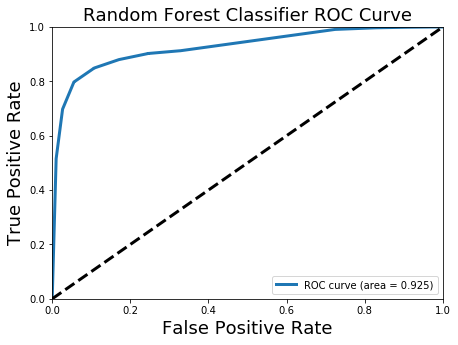

In [498]:
plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Boosting and Bagging for Support Vector Machines,Randomforest, keras ******(To Be done)

In [499]:
linearsvc = LinearSVC()
linearsvc.fit(df_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [500]:
linearsvc.score(df_train, y_train)


0.94282130736314007

In [501]:
linearsvc.score(df_test, y_test)

0.89065308568004797

In [502]:
run_model(df_train, y_train, df_test, y_test, linearsvc)

Base model score: 0.6730
Training set score:  0.9428
Test set score:  0.8911

Confusion Matrix:
       predicted_0  predicted_1
is_0         1979          204
is_1          523         3970

Classification Report:
              precision    recall  f1-score   support

          0       0.79      0.91      0.84      2183
          1       0.95      0.88      0.92      4493

avg / total       0.90      0.89      0.89      6676



# Neural Networks using Tensorflow

In [312]:
import tensorflow as tf
from sklearn import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
# y1 = y_train.ravel()
# y_train = np.array(y1).astype(int)
# y2 = y_test.ravel()
# y_test = np.array(y2).astype(int)

In [314]:
kf = KFold(4, shuffle=True, random_state=2003)

batches = []
for train, test in kf.split(df_train, y_train):
    batches.append(test)
len(batches)

4

In [316]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, df_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
h2 = tf.layers.dense(h1, 30, name='hidden2', activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 30, name='hidden3', activation=tf.nn.relu)
h4 = tf.layers.dense(h3, 30, name='hidden4', activation=tf.nn.relu)
y_hat = tf.layers.dense(h4, 1, name='y_hat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)

training_op = optimizer.minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(25):
        sess.run(training_op, feed_dict={X: df_train, y: y_train})
        
        train_loss = sess.run(loss,feed_dict={X: df_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: df_test, y: y_test})
      
        print('epoch', epoch,'train loss',train_loss,'test loss',test_loss)
   
    pred = sess.run(y_hat, feed_dict={X: df_test})

epoch 0 train loss 0.729749 test loss 0.733013
epoch 1 train loss 0.673362 test loss 0.656746
epoch 2 train loss 0.648435 test loss 0.648778
epoch 3 train loss 0.658367 test loss 0.650174
epoch 4 train loss 0.642988 test loss 0.643976
epoch 5 train loss 0.651842 test loss 0.633619
epoch 6 train loss 0.6616 test loss 0.639076
epoch 7 train loss 0.656378 test loss 0.626278
epoch 8 train loss 0.65399 test loss 0.631289
epoch 9 train loss 0.649005 test loss 0.6284
epoch 10 train loss 0.665981 test loss 0.628503
epoch 11 train loss 0.660299 test loss 0.621969
epoch 12 train loss 0.660562 test loss 0.622858
epoch 13 train loss 0.662346 test loss 0.624439
epoch 14 train loss 0.659995 test loss 0.625071
epoch 15 train loss 0.646064 test loss 0.626855
epoch 16 train loss 0.650282 test loss 0.623049
epoch 17 train loss 0.655919 test loss 0.620121
epoch 18 train loss 0.654679 test loss 0.619614
epoch 19 train loss 0.652748 test loss 0.619462
epoch 20 train loss 0.652646 test loss 0.621511
epoch 2

In [317]:
pred = (pred > .5).astype(int)
metrics.accuracy_score(y_test,pred)

0.68304373876572799

In [318]:
metrics.confusion_matrix(y_test,pred)

array([[   0, 2116],
       [   0, 4560]])

# Logistic Regression

In [503]:
logistic =LogisticRegression()
logistic.fit(df_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [504]:
run_model(df_train, y_train, df_test, y_test,logistic)

Base model score: 0.6730
Training set score:  0.9351
Test set score:  0.9005

Confusion Matrix:
       predicted_0  predicted_1
is_0         2002          181
is_1          483         4010

Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.92      0.86      2183
          1       0.96      0.89      0.92      4493

avg / total       0.91      0.90      0.90      6676



In [505]:
logistic.score(df_train,y_train)

0.93514829570606461

In [506]:
logistic.score(df_test,y_test)

0.90053924505692029

# Principal Component Analysis

In [507]:
from sklearn.decomposition import PCA

In [508]:
pca = PCA(n_components=2)
Xt = pca.fit_transform(df_train)

rfc = RandomForestClassifier()
print(cross_val_score(rfc, Xt, y_train, cv=5).mean())

0.732846186922
